<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Base/HW1_Regression_with_inference_base_pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:

- обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**

> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from ydata_profiling import ProfileReport

random.seed(42)
np.random.seed(42)

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?


Для постоянности данных. Когда мы генерируем рандомные числа, или используем случайные значения, для их вычисления используется сид. Обычно он ставится с запуском или импортом библиотеки, поэтому данные будут разные с каждым перезапуском ядра, или с каждым запуском отдельной программы. В нашем случае ядро активно живет в бэкграунде поэтому перезапуск одной и той же ячейки даст разные числа, не смотря на установленный сид, поэтому необходим перезапуск ядра, чтобы получить те же данные, что и при первом запуске. Это позволяет проще проверять работы, ведь все методы, ориентирующиеся на случайные числа, после перезапуска ядра будут работать абсолютно также, так как сид заранее установлен.


# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!


## **Простейший EDA и обработка признаков (2.5 балла)**


In [2]:
df_train = pd.read_csv("https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv")

print("Train data shape:", df_train.shape)
print("Test data shape:", df_test.shape)

Train data shape: (6999, 13)
Test data shape: (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**

- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты

**0.2 балла**
Ответьте на вопросы:

- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**

- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)


### Temp


#### 30 случайных строк


In [3]:
df_train.sample(30, random_state=42)

name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   
132          Mercedes-Benz S-Class S 350 CDI  2017        5850000      47000   
6974  Fiat Grande Punto 1.3 Dynamic (Diesel)  2012         450000      70000   
3383                       Maruti Ertiga VDI  2012         550000      67000   
5947                     Mahindra Bolero GLX  2006         200000     120000   
4970                Ford Fiesta 1.4 SXi TDCi  2009         180000     163000   
4260                    Maruti SX4 Zxi BSIII  2010         300000      50000   
5861                    Ford Figo Petrol LXI  2012         290000      25000   
2264                   Tata Safari Storme EX  2015         503000     110000   
1941                        Maruti Swift VXI  2018         550000      24400   
763    Ford Fiesta Classic 1.4 Duratorq CLXI  2012         300000      64000   
5384                Maruti Alto 800 LXI BSIV  2016         275000      38000   
3044              BMW X4 M Sport X xDrive20d  2019        5400000       7500   
6575    Ford EcoSport 1.5 TDCi Titanium BSIV  2017         934000     101000   
101                     Hyundai Verna 1.6 SX  2013         522000     150000   
3626                 Maruti Baleno Alpha 1.3  2018         740000      38817   
1371                        Mahindra Xylo D2  2011         450000      56000   
625                    Honda CR-V 2.4 4WD AT  2007         325000      70000   
3915            Mahindra TUV 300 mHAWK100 T8  2017         725000     100000   
1075                 Maruti Wagon R VXi BSII  2012         225000      80000   
6739               Tata Manza Aura Quadrajet  2010         110000      88000   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   
132   Diesel            Dealer    Automatic   First Owner   13.5 kmpl   
6974  Diesel        Individual       Manual   First Owner   20.3 kmpl   
3383  Diesel        Individual       Manual   First Owner  20.77 kmpl   
5947  Diesel        Individual       Manual  Second Owner         NaN   
4970  Diesel            Dealer       Manual   First Owner         NaN   
4260  Petrol        Individual       Manual   First Owner   15.0 kmpl   
5861  Petrol        Individual       Manual   First Owner   15.6 kmpl   
2264  Diesel        Individual       Manual   First Owner   14.1 kmpl   
1941  Petrol        Individual       Manual   First Owner   22.0 kmpl   
763   Diesel        Individual       Manual  Second Owner   17.8 kmpl   
5384  Petrol            De

#### Первые и последние пять строк


In [4]:
display(df_test.head(5))
display(df_test.tail(5))

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 bhp      260Nm@ 1500-2750rpm    5.0  
2    130 bhp           172Nm@ 4300rpm    5.0  
3   98.6 bhp           200Nm@ 1750rpm    5.0  
4     65 bhp     96  Nm at 3000  rpm     5.0

name  year  selling_price  km_driven    fuel  \
995            Hyundai i10 Magna 1.1L  2008         250000     100000  Petrol   
996  Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000  Petrol   
997            Hyundai i20 Era Diesel  2009         340000      40000  Diesel   
998                  Hyundai i10 Asta  2012         350000      25000  Petrol   
999              Honda City i DTec SV  2016         700000     110000  Diesel   

    seller_type transmission         owner     mileage   engine  max_power  \
995  Individual       Manual  Second Owner  19.81 kmpl  1086 CC  68.05 bhp   
996  Individual       Manual  Second Owner   18.6 kmpl  1197 CC  81.83 bhp   
997  Individual       Manual   First Owner   23.0 kmpl  1396 CC     90 bhp   
998  Individual       Manual   First Owner  20.36 kmpl  1197 CC   78.9 bhp   
999  Individual       Manual   First Owner   26.0 kmpl  1498 CC   98.6 bhp   

                       torque  seats  
995          99.04Nm@ 4500rpm    5.0  
996          114.7Nm@ 4000rpm    5.0  
997  22.4 kgm at 1750-2750rpm    5.0  
998          111.8Nm@ 4000rpm    5.0  
999            200Nm@ 1750rpm    5.0

#### Столбцы и строки с пропусками


In [5]:
na_cols = df_train.columns[df_train.isna().any()].tolist()
print("Столбцы с пропусками train:", na_cols)

Столбцы с пропусками train: ['mileage', 'engine', 'max_power', 'torque', 'seats']


In [6]:
print("Столбцы с пропусками test:", df_test.columns[df_test.isna().any()].tolist())

Столбцы с пропусками test: ['mileage', 'engine', 'max_power', 'torque', 'seats']


In [7]:
num_duplicates = df_train.duplicated().sum()
print("Явных дубликатов:", num_duplicates)

Явных дубликатов: 985


#### Ответы на вопросы


##### Вопрос 1


Можно:

- понять структуру данных — какие столбцы есть, какие типы в них в основном лежат
- увидеть примерные диапазоны значений, либо хотя бы понять порядок
- заметить очевидные аномалии, н.п. кривые даты, либо текст вместо чисел
- увидеть редкие категории, для этого пожалуй лучше подойдут методы, рассчитанные на уникальные значения (тут опять же как повезет, но в целом, кажется, что можно)
- понять порядок строк, отсортированы данные или нет, есть ли вообще какая-либо упорядоченность

Нельзя:

- сделать статистические выводы о данных
- оценить распределения признаков
- сделать выводы о наличии выбросов в целом
- сделать выводы о корреляциях или структуре зависимостей

В общем и целом, маленький фрагмент таблицы нерепрезентативен, чтобы делать какие-либо выводы о зависимостях, распределениях и прочих вещах связанных непосредственно с данными, зато часто такие фрагменты позволяют понять, с какими данными мы имеем дело в целом, сколько у нас столбцов, какие они, что они описывают, как упорядоченны данные, если они вообще упорядоченны. В общем, такие фрагменты дают нам наиболее общее представление о данных, можно сказать абстрактное, тогда как фактическое представление о данных, мы получаем уже после обработки и работы со статистикой.


##### Вопрос 2


Одного лишь duplicated для удаления дубликатов в общем смысле, естественно недостаточно. Он ловит только полные дубли, где совпадают всё и вся, а нам, например на практике, нужно смотреть на дубликаты, где может отличаться, скажем только целевая переменная (полностью одинаковые машины, но с разными ценами), оно также не учтет все моменты разного формата описания данных. Например, в mileage, у нас используется текстовое представление числа, но ведь "18 kpml" и "18.0 kpml" мы считаем одним и тем же значением, duplicated его не отловит. Короче говоря, перед тем как использовать duplicated нужно проделать большое количество работы по подготовке, привести все признаки к единому виду, убедиться, что у нас нет, например, одинаковых категорий с пробельными символами в конце, чтобы "Manual" и "Manual " не считались разными. Опять же, нужно также сравнивать только те признаки, которые несут полезную информацию


#### ydata


In [8]:
profile = ProfileReport(df_train, title="Profiling report", explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 125.06it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
profile.to_file("train_profile.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Заполнение пропусков


In [10]:
df_train

name  year  selling_price  km_driven    fuel  \
0            Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1      Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3            Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4     Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   
...                             ...   ...            ...        ...     ...   
6994              Hyundai i20 Magna  2013         320000     110000  Petrol   
6995          Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
6996         Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
6997                Tata Indigo CR4  2013         290000      25000  Diesel   
6998                Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner     mileage   engine  \
0     Individual       Manual           First Owner   23.4 kmpl  1248 CC   
1     Individual       Manual          Second Owner  21.14 kmpl  1498 CC   
2     Individual       Manual           First Owner   23.0 kmpl  1396 CC   
3     Individual       Manual           First Owner   16.1 kmpl  1298 CC   
4     Individual       Manual           First Owner  20.14 kmpl  1197 CC   
...          ...          ...                   ...         ...      ...   
6994  Individual       Manual           First Owner   18.5 kmpl  1197 CC   
6995  Individual       Manual  Fourth & Above Owner   16.8 kmpl  1493 CC   
6996  Individual       Manual           First Owner   19.3 kmpl  1248 CC   
6997  Individual       Manual           First Owner  23.57 kmpl  1396 CC   
6998  Individual       Manual           First Owner  23.57 kmpl  1396 CC   

       max_power                     torque  seats  
0         74 bhp             190Nm@ 2000rpm    5.0  
1     103.52 bhp        250Nm@ 1500-2500rpm    5.0  
2         90 bhp   22.4 kgm at 1750-2750rpm    5.0  
3       88.2 bhp      11.5@ 4,500(kgm@ rpm)    5.0  
4      81.86 bhp          113.75nm@ 4000rpm    5.0  
...          ...                        ...    ...  
6994   82.85 bhp           113.7Nm@ 4000rpm    5.0  
6995     110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0  
6996    73.9 bhp             190Nm@ 2000rpm    5.0  
6997      70 bhp        140Nm@ 1800-3000rpm    5.0  
6998      70 bhp        140Nm@ 1800-3000rpm    5.0  

[6999 rows x 13 columns]

In [11]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про _тренировочному_ набору данных и им же заполняете _тестовый_.


In [12]:
num_cols = df_train.select_dtypes(include="number").columns.tolist()

medians = df_train[num_cols].median()

df_train[num_cols] = df_train[num_cols].fillna(medians)
df_test[num_cols] = df_test[num_cols].fillna(medians)

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6999 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [14]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats              0
dtype: int64

### **Задание 2 (0.5 балла)**

На прошлом шаге вы убедились, что явных дубликатов в таблице нет. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ] Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [15]:
feature_cols_wo_target = [col for col in df_train.columns if col != "selling_price"]

dup_mask = df_train.duplicated(subset=feature_cols_wo_target, keep=False)

dup_mask.sum()

np.int64(1799)

In [16]:
df_hidden_dups = df_train[dup_mask].sort_values(feature_cols_wo_target)
df_hidden_dups

name  year  selling_price  km_driven  \
1703  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   
6307  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   
1836               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
6704               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
117             Audi Q5 35TDI Premium Plus  2018        3975000      31800   
...                                    ...   ...            ...        ...   
5637        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
5652        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
5753        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
5991        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
6778        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   

        fuel seller_type transmission        owner     mileage   engine  \
1703  Diesel      Dealer    Automatic  First Owner  15.73 kmpl  1968 CC   
6307  Diesel      Dealer    Automatic  First Owner  15.73 kmpl  1968 CC   
1836  Diesel  Individual    Automatic  First Owner  13.22 kmpl  2967 CC   
6704  Diesel  Individual    Automatic  First Owner  13.22 kmpl  2967 CC   
117   Diesel      Dealer    Automatic  First Owner  17.01 kmpl  1968 CC   
...      ...         ...          ...          ...         ...      ...   
5637  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   
5652  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   
5753  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   
5991  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   
6778  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   

       max_power               torque  seats  
1703  174.33 bhp  380Nm@ 1750-2500rpm    5.0  
6307  174.33 bhp  380Nm@ 1750-2500rpm    5.0  
1836   241.4 bhp  580Nm@ 1400-3250rpm    5.0  
6704   241.4 bhp  580Nm@ 1400-3250rpm    5.0  
117      188 bhp  400nm@ 1750-3000rpm    5.0  
...          ...                  ...    ...  
5637     190 bhp                400Nm    5.0  
5652     190 bhp                400Nm    5.0  
5753     190 bhp                400Nm    5.0  
5991     190 bhp                400Nm    5.0  
6778     190 bhp                400Nm    5.0  

[1799 rows x 13 columns]

In [17]:
df_train = df_train.drop_duplicates(subset=feature_cols_wo_target, keep="first")

In [18]:
df_train = df_train.reset_index(drop=True)

In [19]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками `mileage, engine, max_power и torque` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**

- [ ] Уберите единицы измерения для признаков `mileage, engine, max_power`.
- [ ] Приведите тип данных к `float`.
- [ ] Удалите столбец `torque`

**Важно**

- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец `torque` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.


In [20]:
cols_to_clean = ["mileage", "engine", "max_power"]

for df in (df_train, df_test):
    for col in cols_to_clean:
        df[col] = df[col].astype(str).str.extract(r"(\d+\.?\d*)", expand=False).astype(float)


if "torque" in df_train.columns:
    df_train.drop(columns=["torque"], inplace=True)

if "torque" in df_test.columns:
    df_test.drop(columns=["torque"], inplace=True)

In [21]:
df_train[cols_to_clean].dtypes

mileage      float64
engine       float64
max_power    float64
dtype: object

In [22]:
display(df_train.head())
display(df_test.head())

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner  mileage  engine  max_power  seats  
0  Individual       Manual   First Owner    23.40  1248.0      74.00    5.0  
1  Individual       Manual  Second Owner    21.14  1498.0     103.52    5.0  
2  Individual       Manual   First Owner    23.00  1396.0      90.00    5.0  
3  Individual       Manual   First Owner    16.10  1298.0      88.20    5.0  
4  Individual       Manual   First Owner    20.14  1197.0      81.86    5.0

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner  mileage  engine  max_power  \
0  Diesel  Individual       Manual   First Owner     14.0  2498.0      112.0   
1  Diesel  Individual       Manual   First Owner     21.5  1497.0      108.5   
2  Petrol  Individual    Automatic   First Owner     12.9  1799.0      130.0   
3  Diesel  Individual       Manual   First Owner     25.1  1498.0       98.6   
4  Petrol  Individual       Manual  Second Owner     16.5  1172.0       65.0   

   seats  
0    7.0  
1    5.0  
2    5.0  
3    5.0  
4    5.0

In [23]:
df[df["engine"].isna()]

name  year  selling_price  \
34                      Toyota Etios Liva GD SP  2012         405000   
57                           Tata Sumo EX BS IV  2012         254999   
66                         Maruti Swift 1.3 ZXI  2008         200000   
71                            Hyundai Santro LE  2002          35000   
118                          Mahindra Bolero LX  2006         210000   
145                       Maruti Swift VDI BSIV  2011         340000   
149                      Hyundai Santro Xing XG  2005         110000   
208  Tata Indica Vista Aqua 1.3 Quadrajet (ABS)  2012         200000   
295         Hyundai Santro Xing XS eRLX Euro II  2003          85000   
471              Hyundai Santro GLS I - Euro II  2009         195000   
508                              Toyota Etios V  2011         420000   
574              Hyundai Santro GLS I - Euro II  2001          52000   
578                     Maruti Omni E 8 Str STD  2012         175000   
742                              Toyota Etios V  2011         270000   
781                             Toyota Etios GD  2012         400000   
893                           Hyundai Santro AT  2005         120000   
941         Hyundai Santro Xing XL eRLX Euro II  2006         150000   
959               Hyundai Santro GLS I - Euro I  1999          60000   
981                           Hyundai Santro LE  2001          33983   

     km_driven    fuel seller_type transmission         owner  mileage  \
34      150000  Diesel  Individual       Manual   First Owner      NaN   
57      190000  Diesel  Individual       Manual   Third Owner      NaN   
66       90000  Petrol  Individual       Manual   First Owner      NaN   
71      184000  Petrol  Individual       Manual  Second Owner      NaN   
118     120000  Diesel  Individual       Manual   First Owner      NaN   
145     160000  Diesel  Individual       Manual  Second Owner      NaN   
149      53563  Petrol      Dealer       Manual  Second Owner      NaN   
208      80000  Diesel  Individual       Manual  Second Owner      NaN   
295      68300  Petrol  Individual       Manual   Third Owner      NaN   
471      56000  Petrol      Dealer       Manual  Second Owner      NaN   
508      28100  Petrol  Individual       Manual   First Owner      NaN   
574      70000  Petrol  Individual       Manual  Second Owner      NaN   
578      60000  Petrol  Individual       Manual   Third Owner      NaN   
742     167000  Petrol  Individual       Manual   First Owner      NaN   
781     158500  Diesel  Individual       Manual   Third Owner      NaN   
893     190000  Petrol  Individual    Automatic  Second Owner      NaN   
941     100000  Petrol  Individual       Manual  Second Owner      NaN   
959     140000  Petrol  Individual       Manual   Third Owner      NaN   
981      80000  Petrol  Individual       Manual  Second Owner      NaN   

     engine  max_power  seats  
34      NaN        NaN    5.0  
57      NaN        NaN    5.0  
66      NaN        NaN    5.0  
71      NaN        NaN    5.0  
118     NaN        NaN    5.0  
145     NaN        NaN    5.0  
149     NaN        NaN    5.0  
208     NaN        NaN    5.0  
295     NaN        NaN    5.0  
471     NaN        NaN    5.0  
508     NaN        NaN    5.0  
574     NaN        NaN    5.0  
578     NaN        NaN    5.0  
742     NaN        NaN    5.0  
781     NaN        NaN    5.0  
893     NaN        NaN    5.0  
941     NaN        NaN    5.0  
959     NaN        NaN    5.0  
981     NaN        NaN    5.0

так как в следующей таске указывается, что пропусков не осталось, проверим и заполним их медианой


In [24]:
num_cols = df_train.select_dtypes(include="number").columns.tolist()

medians = df_train[num_cols].median()

df_train[num_cols] = df_train[num_cols].fillna(medians)
df_test[num_cols] = df_test[num_cols].fillna(medians)

In [25]:
df_train.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы `engnine` и `seats` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.


In [26]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [27]:
for df in (df_train, df_test):

    df["engine"] = df["engine"].astype(int)
    df["seats"] = df["seats"].astype(int)

display(df_train[["engine", "seats"]].dtypes)

engine    int64
seats     int64
dtype: object

In [28]:
df_train.shape

(5840, 12)

### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**

- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте `.describe()` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.


#### Числовые


In [29]:
print("train")
display(df_train.describe(include="number"))
print("test")
display(df_test.describe(include="number"))

train


year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  5840.000000  5840.000000  
mean     87.906371     5.426712  
std      31.640418     0.982344  
min       0.000000     2.000000  
25%      68.000000     5.000000  
50%      81.860000     5.000000  
75%      99.000000     5.000000  
max     400.000000    14.000000

test


year  selling_price      km_driven     mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.00000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.33881  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.95175   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.00000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.55000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.37000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.30000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.26000  3604.00000   

         max_power        seats  
count  1000.000000  1000.000000  
mean     90.841670     5.403000  
std      34.893389     0.912921  
min      34.200000     4.000000  
25%      69.000000     5.000000  
50%      82.425000     5.000000  
75%     102.000000     5.000000  
max     280.000000     9.000000

#### Категориальные


In [30]:
print("train")
display(df_train.describe(include="object"))

print("test")
display(df_test.describe(include="object"))

train


name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

test


name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

#### Влияние заполнения пропусков на данные


Раз корректно сравнивать, давайте заново получим данные и обработаем столбцы, но в этот раз без замены NaN на что-либо


In [31]:
df_train_unfilled = pd.read_csv(
    "https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv"
)
df_test_unfilled = pd.read_csv("https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv")

cols_to_clean = ["mileage", "engine", "max_power"]

for df in (df_train_unfilled, df_test_unfilled):
    for col in cols_to_clean:
        df[col] = df[col].astype(str).str.extract(r"(\d+\.?\d*)", expand=False).astype(float)


if "torque" in df_train_unfilled.columns:
    df_train_unfilled.drop(columns=["torque"], inplace=True)

if "torque" in df_test_unfilled.columns:
    df_test_unfilled.drop(columns=["torque"], inplace=True)

Удалим еще и дубликаты, как в предыдущем датасете, так как это не должно повлиять на распределение


In [32]:
feature_cols_wo_target_unfilled = [col for col in df_train_unfilled.columns if col != "selling_price"]

df_train_unfilled = df_train_unfilled.drop_duplicates(subset=feature_cols_wo_target_unfilled, keep="first")
df_train_unfilled = df_train_unfilled.reset_index(drop=True)

In [33]:
df_train_unfilled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5654 non-null   float64
 9   engine         5654 non-null   float64
 10  max_power      5656 non-null   float64
 11  seats          5654 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 547.6+ KB


Штош, данные мы привели, так что пора сравнивать


In [34]:
print("train")
display(df_train_unfilled.describe(include="object"))


print("test")
display(df_test_unfilled.describe(include="object"))

train


name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

test


name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

Как можно заметить, категориальные не поменялись, оно и верно, мы не заполняли там пропуски, проверил просто на всякий случай


In [35]:
print("train")
print("new")
display(df_train.describe(include="number"))
print("old")
display(df_train_unfilled.describe(include="number"))
print("test")
print("new")
display(df_test.describe(include="number"))
print("old")
display(df_test_unfilled.describe(include="number"))

train
new


year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  5840.000000  5840.000000  
mean     87.906371     5.426712  
std      31.640418     0.982344  
min       0.000000     2.000000  
25%      68.000000     5.000000  
50%      81.860000     5.000000  
75%      99.000000     5.000000  
max     400.000000    14.000000

old


year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5654.000000  5654.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.432842  1435.418111   
std       4.095622   5.354320e+05  6.007114e+04     4.051002   492.453262   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.800000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.320000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power       seats  
count  5656.000000  5654.00000  
mean     88.103070     5.44075  
std      32.131943     0.99527  
min       0.000000     2.00000  
25%      68.000000     5.00000  
50%      81.860000     5.00000  
75%     100.000000     5.00000  
max     400.000000    14.00000

test
new


year  selling_price      km_driven     mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.00000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.33881  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.95175   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.00000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.55000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.37000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.30000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.26000  3604.00000   

         max_power        seats  
count  1000.000000  1000.000000  
mean     90.841670     5.403000  
std      34.893389     0.912921  
min      34.200000     4.000000  
25%      69.000000     5.000000  
50%      82.425000     5.000000  
75%     102.000000     5.000000  
max     280.000000     9.000000

old


year  selling_price      km_driven     mileage       engine  \
count  1000.000000   1.000000e+03    1000.000000  981.000000   981.000000   
mean   2013.681000   6.179010e+05   71393.341000   19.338206  1458.882773   
std       4.012149   7.585539e+05   48486.218662    3.989872   526.228560   
min    1995.000000   3.100000e+04    1303.000000    0.000000   624.000000   
25%    2011.000000   2.500000e+05   37000.000000   16.500000  1197.000000   
50%    2014.000000   4.349990e+05   61500.000000   19.330000  1248.000000   
75%    2017.000000   6.700000e+05  100000.000000   22.320000  1582.000000   
max    2020.000000   6.000000e+06  375000.000000   32.260000  3604.000000   

        max_power       seats  
count  981.000000  981.000000  
mean    91.015627    5.410805  
std     35.207383    0.919985  
min     34.200000    4.000000  
25%     69.000000    5.000000  
50%     83.100000    5.000000  
75%    102.000000    5.000000  
max    280.000000    9.000000

##### Выводы


Очевидно, что заполнение пропусков прибавило count, поэтому на него особо смотреть смысла нет.

- Во всех столбцах mean изменился, но кажется, нигде эти изменения не превышают пол процента, так что это не влияет на распределение
- std снизился, но, опять же, немного, на распределение повлиять никак не должно
- минимумы и максимумы никак не изменились, влияния на распределение все еще нет
- медианы и квантили остались без изменений

Кажется, что наше заполнение оставило данные в рамках допустимых погрешностей, сильного влияния на распределение нет


#### Выводы о данных на основе статистики


Статистика выглядит схожей, что для числовых переменных, что для категориальных. Это должно быть хорошо, ведь в таком случае мы рассматриваем действительно похожие выборки с одинаковым распределением данных. Распределения признаков в train и test выглядят сопоставимыми: размах значений, медианы и квартильные разницы близки. В категориальных все тоже сходиться, разве что отличается самое популярное наименование, остальные данные выглядят одинаковыми. Я не вижу явных признаков, которые бы намекали на какие-либо проблемы с данными, поэтому считаю, что данные подготовлены к дальнейшей работе в полной мере.


In [36]:
assert df_train.shape == (
    5840,
    12,
)  # исправил, было 13, но должно было быть 12, писали в чате (https://t.me/c/3262103700/430/509)

## **Визуализации (1 балл + 0.5 бонус)**


Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**


### **Задание 6 (0.5 балла)**

Шаг 1.

- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
- Можно ли предположить на основе распределений связь признаков с целевой переменной?
- Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"


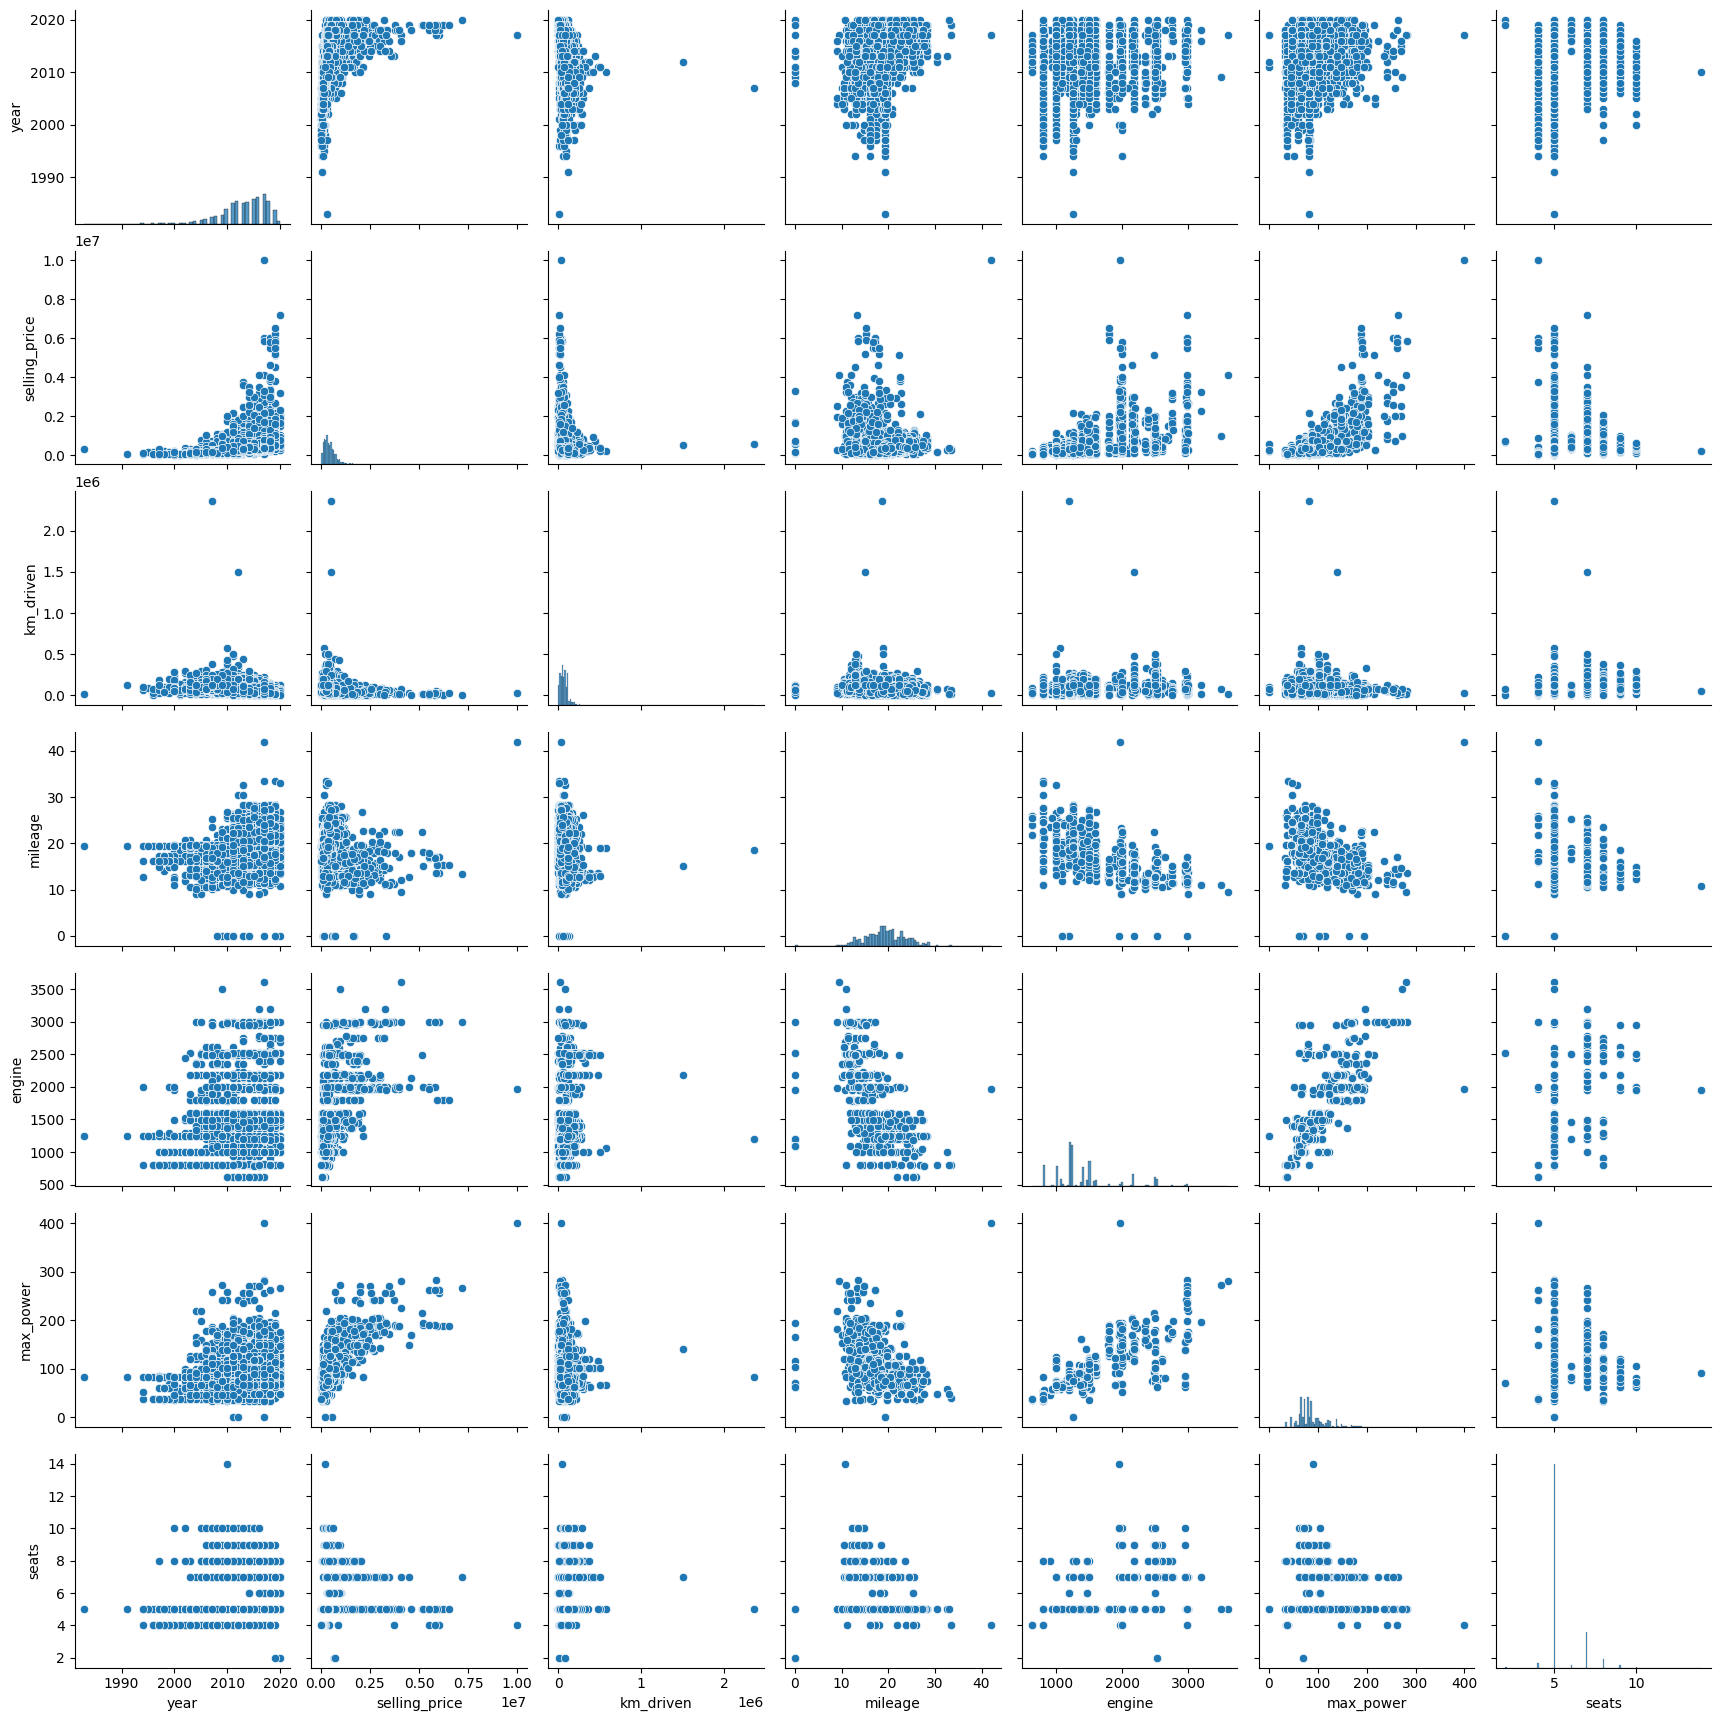

In [37]:
%matplotlib inline 
# иначе не отображалось, у меня vs code просто), думаю такой проблемы в юпитере не будет
sns.pairplot(df_train)
plt.show()

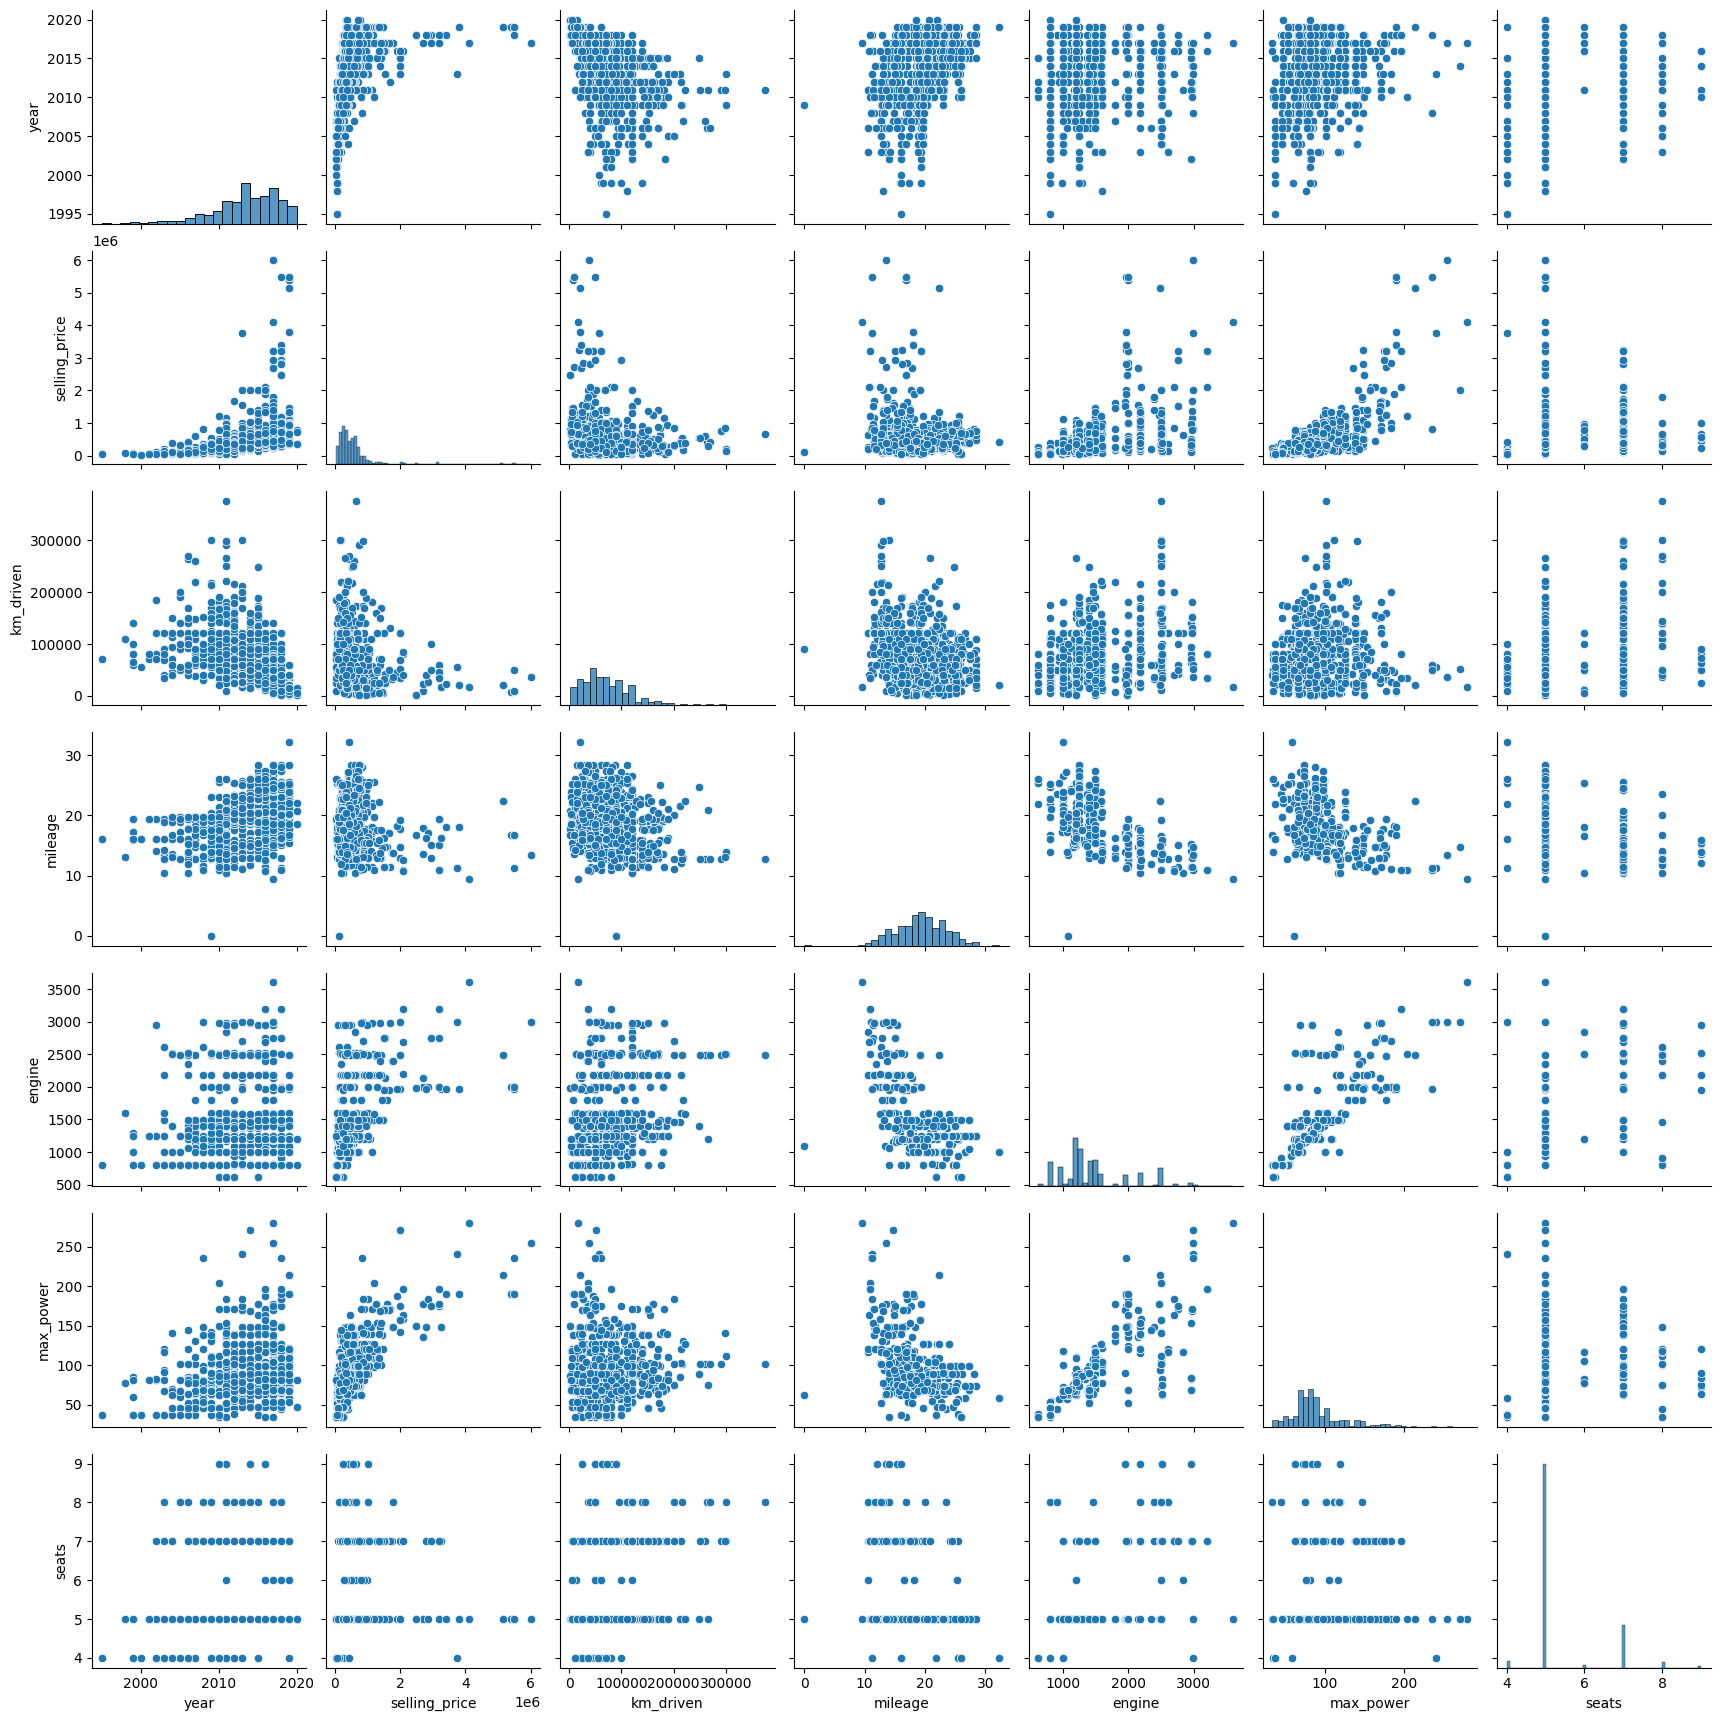

In [38]:
sns.pairplot(df_test)
plt.show()

- Можно явно заметить, что цена увеличивается с годом производства, что логично, чем новее автомобиль, тем выше цена
- Можно также заметить, что с ростом пробега цена падает, что тоже логично, ведь пробег это один из основных маркеров износа автомобиля
- Также явно mileage имеет связь с max_power, мощные двигатели действительно обычно менее экономичные
- С ростом max_power также растет и цена, более мощный автомобиль стоит дороже
- max_power и engine явно коррелируют


Похожими ли оказались совокупности при разделении на трейн и тест? Да, похожи. Конечно в df_train из-за большего кол-ва данных могут быть различные выбросы, единичные случаи, которые ""прижимают" график вниз, как с mileage и km_driven, можно заметить, что высокие данные прижимают его вниз, однако общая картина остается похожей. В целом все основные соотношения, на мой взгляд очень похожи


### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**

- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [39]:
corr_matrix = df_train[df_train.select_dtypes(include=["number"]).columns].corr(method="pearson")
corr_matrix

year  selling_price  km_driven   mileage    engine  \
year           1.000000       0.427279  -0.368966  0.341334  0.002819   
selling_price  0.427279       1.000000  -0.164828 -0.104769  0.447672   
km_driven     -0.368966      -0.164828   1.000000 -0.182086  0.229766   
mileage        0.341334      -0.104769  -0.182086  1.000000 -0.572893   
engine         0.002819       0.447672   0.229766 -0.572893  1.000000   
max_power      0.156858       0.692814   0.024588 -0.373390  0.681117   
seats          0.041178       0.149953   0.192328 -0.451059  0.652172   

               max_power     seats  
year            0.156858  0.041178  
selling_price   0.692814  0.149953  
km_driven       0.024588  0.192328  
mileage        -0.373390 -0.451059  
engine          0.681117  0.652172  
max_power       1.000000  0.244112  
seats           0.244112  1.000000

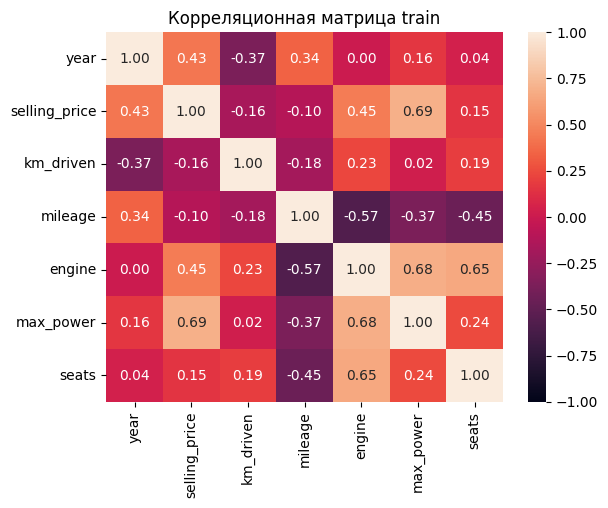

In [40]:
sns.heatmap(corr_matrix, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title("Корреляционная матрица train")
plt.show()

- [ ] Ответьте на вопросы:
- Какие 2 признака наименее скоррелированы между собой?
- Между какими наблюдается довольно сильная положительная линейная зависимость?
- Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?


- engine и year
- max_power и selling_price, а также max_power и engine
- Относительно, связь конечно есть(-0.37, обратная зависимость), но она небольшая. Действительно, там есть обратная зависимость, так что, с учетом формулировки "скорее всего", вероятно, с высказыванием можно согласиться.


### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.


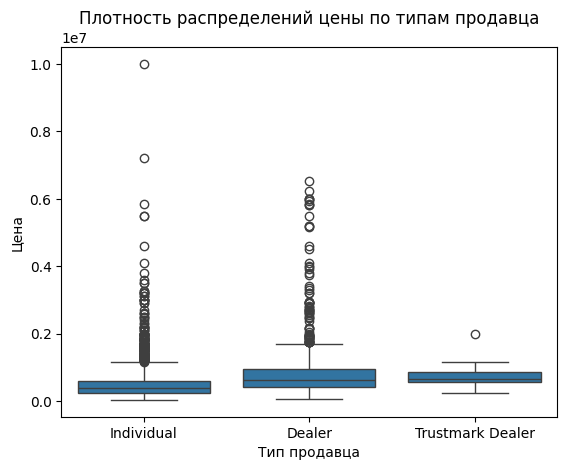

In [41]:
sns.boxplot(data=df_train, x="seller_type", y="selling_price")
plt.title("Плотность распределений цены по типам продавца")
plt.xlabel("Тип продавца")
plt.ylabel("Цена")
plt.show()

Мы можем заметить, что у диллеров цена будет выше по медиане. При этом, можно заметить, что выбросы стоимости у индивидуальных продавцов сильнее, что логично, ведь они сами ставят цену, а диллеры, все-таки, регулируются. У диллеров куда более сконцентрированная цена, чем у индивидуальных продавцов.


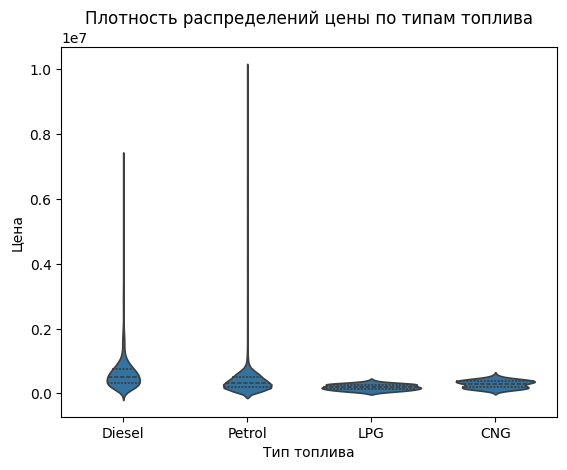

In [42]:
sns.violinplot(data=df_train, x="fuel", y="selling_price", inner="quartile")
plt.title("Плотность распределений цены по типам топлива")
plt.xlabel("Тип топлива")
plt.ylabel("Цена")
plt.show()

Не смотря на выбросы, можно заметить, что дизельные двигатели в целом дороже, чем бензиновые. LPG и CNG представляют собой дешёвый сегмент. Мне кажется, что тип топлива это очень информативный признак, который вполне может влиять на распределение цены, поэтому в будущем, я думаю, его стоит включить в кодирование


# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;


### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.


In [43]:
df_train_num = df_train.copy().select_dtypes(include="number")
df_test_num = df_test.copy().select_dtypes(include="number")

In [44]:
y_train = df_train_num["selling_price"]
X_train = df_train_num.drop(columns=["selling_price"])

In [45]:
assert X_train.shape == (5840, 6)

In [46]:
y_test = df_test_num["selling_price"]
X_test = df_test_num.drop(columns=["selling_price"])

In [47]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!

- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.


In [48]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = MSE(y_train, y_train_pred)
mse_test = MSE(y_test, y_test_pred)

print(f"R2 (train): {r2_train:.4f}")
print(f"R2 (test): {r2_test:.4f}")
print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test): {mse_test:.2f}")

R2 (train): 0.5923
R2 (test): 0.5941
MSE (train): 116874153930.03
MSE (test): 233298779730.46


$R^2$ выглядит нормальным, нельзя сказать, что модель переобучена. В целом на train и test он практически не отличается, что значит, что обобщенная информация хорошо ложиться на тестовые данные. $MSE$ на тесте выше, чем на трейне, что объясняется квадратичным ростом ошибки на дорогих автомобилях (по графикам ранее, можно было заметить, что распределение цены на тесте предполагает большие значения, чем на трейне), поэтому, мне кажется, что это не указывает на деградацию модели, а просто отражает разброс цены, нашей целевой переменной. Возможно, чтобы $MSE$ был получше стоит прологарифмировать цену, но тут уже по заданиям буду дальше смотреть.


### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.


In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)

y_train_pred_scaled = lr_scaled.predict(X_train_scaled)
y_test_pred_scaled = lr_scaled.predict(X_test_scaled)

r2_train_scaled = r2_score(y_train, y_train_pred_scaled)
r2_test_scaled = r2_score(y_test, y_test_pred_scaled)

mse_train_scaled = MSE(y_train, y_train_pred_scaled)
mse_test_scaled = MSE(y_test, y_test_pred_scaled)

print(f"R2 (train): {r2_train_scaled:.4f}")
print(f"R2 (test): {r2_test_scaled:.4f}")
print(f"MSE (train): {mse_train_scaled:.2f}")
print(f"MSE (test): {mse_test_scaled:.2f}")

R2 (train): 0.5923
R2 (test): 0.5941
MSE (train): 116874153930.03
MSE (test): 233298779730.45


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?


In [51]:
coefs = lr_scaled.coef_
cols = X_train.columns.tolist()

coef_series = pd.Series(coefs, index=cols).sort_values(key=lambda s: s.abs(), ascending=False)
coef_series

max_power    322807.353259
year         152772.570846
engine        61178.494337
km_driven    -44158.818520
mileage       28833.925778
seats        -23209.132486
dtype: float64

Им оказался max_power


### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией. Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.


In [52]:
from sklearn.linear_model import Lasso

lasso = Lasso(random_state=42)
lasso.fit(X_train_scaled, y_train)

y_train_pred_lasso = lasso.predict(X_train_scaled)
y_test_pred_lasso = lasso.predict(X_test_scaled)

r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

mse_train_lasso = MSE(y_train, y_train_pred_lasso)
mse_test_lasso = MSE(y_test, y_test_pred_lasso)

print(f"R2 (train): {r2_train_lasso:.4f}")
print(f"R2 (test): {r2_test_lasso:.4f}")
print(f"MSE (train): {mse_train_lasso:.2f}")
print(f"MSE (test): {mse_test_lasso:.2f}")

coefs_lasso = pd.Series(lasso.coef_, index=X_train.columns)
print(coefs_lasso)
print("Всего зануленных:", (coefs_lasso == 0).sum())

R2 (train): 0.5923
R2 (test): 0.5941
MSE (train): 116874153940.14
MSE (test): 233299450599.17
year         152772.390214
km_driven    -44157.689858
mileage       28832.043396
engine        61173.662409
max_power    322808.236919
seats        -23206.255649
dtype: float64
Всего зануленных: 0


Качество Lasso-регрессии на нормализованных признаках практически совпадает с качеством обычной линейной регрессии, то есть добавление l1 с параметрами по умолчанию никак не улучшило и не ухудшило результаты. Ни один коэфф не был занулен, что объясняется в целом тем, что признаков достаточно мало и они все достаточно важны для предсказания цены, а коэфф регуляризации по умолчанию (1, на сколько я помню (а я загуглил и оказалось, что я правильно помню)) слишком маленький


### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
- Сколько грид-сёрчу пришлось обучать моделей?
- Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?


In [53]:
from sklearn.model_selection import GridSearchCV

param_grid_lasso = {"alpha": np.logspace(-5, 5, 50)}


lasso_gs = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso, cv=10, scoring="r2")

lasso_gs.fit(X_train_scaled, y_train)

print("Лучшие параметры:", lasso_gs.best_params_)

best_lasso = lasso_gs.best_estimator_

y_train_pred_best_lasso = best_lasso.predict(X_train_scaled)
y_test_pred_best_lasso = best_lasso.predict(X_test_scaled)

r2_train_best_lasso = r2_score(y_train, y_train_pred_best_lasso)
r2_test_best_lasso = r2_score(y_test, y_test_pred_best_lasso)

mse_train_best_lasso = MSE(y_train, y_train_pred_best_lasso)
mse_test_best_lasso = MSE(y_test, y_test_pred_best_lasso)
print(f"Лучший скор при кросс-вале: {lasso_gs.best_score_}")
print("Метрики лучшей модельки")
print(f"R2 (train): {r2_train_best_lasso:.4f}")
print(f"R2 (test): {r2_test_best_lasso:.4f}")
print(f"MSE (train): {mse_train_best_lasso:.2f}")
print(f"MSE (test): {mse_test_best_lasso:.2f}")

coefs_lasso = pd.Series(best_lasso.coef_, index=X_train.columns)
print("Коэффы лучшей модельки")
print(coefs_lasso)
print("Всего зануленных:", (coefs_lasso == 0).sum())

Лучшие параметры: {'alpha': np.float64(24420.53094548655)}
Лучший скор при кросс-вале: 0.5749691268110654
Метрики лучшей модельки
R2 (train): 0.5835
R2 (test): 0.5669
MSE (train): 119390697496.69
MSE (test): 248973076282.10
Коэффы лучшей модельки
year         147069.314449
km_driven    -17525.926476
mileage           0.000000
engine            0.000000
max_power    323864.356960
seats            -0.000000
dtype: float64
Всего зануленных: 3


Я перебирал 50 параметров, по 10 фолдов, соответственно было обучено 50\*10 = 500 моделей

Коэфф регуляризации 24420.53094548655, занулилось 3 признака


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
- Сколько грид-сёрчу пришлось обучать моделей?
- Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?


In [54]:
from sklearn.linear_model import ElasticNet

param_grid_en = {
    "alpha": np.logspace(-5, 5, 50),
    "l1_ratio": np.linspace(0.1, 0.9, 50),
}

en = ElasticNet(random_state=42, max_iter=10000)

en_gs = GridSearchCV(estimator=en, param_grid=param_grid_en, cv=10, scoring="r2", n_jobs=-1)

en_gs.fit(X_train_scaled, y_train)

best_en = en_gs.best_estimator_

y_train_pred_en = best_en.predict(X_train_scaled)
y_test_pred_en = best_en.predict(X_test_scaled)

r2_train_en = r2_score(y_train, y_train_pred_en)
r2_test_en = r2_score(y_test, y_test_pred_en)
mse_train_en = MSE(y_train, y_train_pred_en)
mse_test_en = MSE(y_test, y_test_pred_en)

print(f"R2 (train): {r2_train_en:.4f}")
print(f"R2 (test): {r2_test_en:.4f}")
print(f"MSE (train): {mse_train_en:.2f}")
print(f"MSE (test): {mse_test_en:.2f}")

print("Лучшие параметры:", en_gs.best_params_)

R2 (train): 0.5849
R2 (test): 0.5625
MSE (train): 118978547694.23
MSE (test): 251488237684.23
Лучшие параметры: {'alpha': np.float64(0.19306977288832497), 'l1_ratio': np.float64(0.2469387755102041)}


Гридсерчу пришлось обучить 50 _ 50 _ 10 = 25000 моделей.
Гиперпараметры: alpha=0.19306977288832497, l1_ratio=0.2469387755102041


# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**

- [ ] Удалить столбец`name`


In [55]:
df_train_cat = df_train.drop(columns=["name"])
df_test_cat = df_test.drop(columns=["name"])

In [56]:
X_train_cat = df_train_cat.drop(columns=["selling_price"])
X_test_cat = df_test_cat.drop(columns=["selling_price"])

y_train_cat = df_train_cat["selling_price"]
y_test_cat = df_test_cat["selling_price"]

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert


In [57]:
X_train_cat["brand"] = df_train["name"].str.split().str[0]
X_test_cat["brand"] = df_test["name"].str.split().str[0]

Я решил оставить только марки, это зачастую влияет на цену, даже в схожем классе автомобилей


In [58]:
X_train_cat.shape

(5840, 11)

In [59]:
assert X_train_cat.shape == (5840, 11)  # изменил так как добавил brand

In [60]:
X_train_cat.describe(include="object")

fuel seller_type transmission        owner   brand
count     5840        5840         5840         5840    5840
unique       4           3            2            5      30
top     Diesel  Individual       Manual  First Owner  Maruti
freq      3177        5223         5336         3603    1804

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и `seats` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.


In [61]:
from sklearn.preprocessing import OneHotEncoder  # или можно использовать get_dummies из библиотеки pandas

cat_cols = X_train_cat.select_dtypes(include="object").columns.tolist()
cat_cols += ["seats"]

ohe = OneHotEncoder(handle_unknown="ignore", drop="first", sparse_output=False)

display(X_train_cat[cat_cols].head())

X_train_cat_ohe = ohe.fit_transform(X_train_cat[cat_cols])

X_test_cat_ohe = ohe.transform(X_test_cat[cat_cols])

fuel seller_type transmission         owner    brand  seats
0  Diesel  Individual       Manual   First Owner   Maruti      5
1  Diesel  Individual       Manual  Second Owner    Skoda      5
2  Diesel  Individual       Manual   First Owner  Hyundai      5
3  Petrol  Individual       Manual   First Owner   Maruti      5
4  Petrol  Individual       Manual   First Owner  Hyundai      5

c:\Users\Ax3l3rator\Documents\hse\ai\ml\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [62]:
num_cols = [c for c in X_train_cat.columns if c not in cat_cols]

X_train_num = X_train_cat[num_cols].values
X_test_num = X_test_cat[num_cols].values


ohe_cols = ohe.get_feature_names_out(cat_cols)

X_train_ohe_df = pd.DataFrame(X_train_cat_ohe, columns=ohe_cols, index=X_train_cat.index)
X_test_ohe_df = pd.DataFrame(X_test_cat_ohe, columns=ohe_cols, index=X_test_cat.index)

X_train_full_ohe = pd.concat([X_train_cat.drop(columns=cat_cols), X_train_ohe_df], axis=1)

X_test_full_ohe = pd.concat([X_test_cat.drop(columns=cat_cols), X_test_ohe_df], axis=1)

In [63]:
X_train_full_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 52 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          5840 non-null   int64  
 1   km_driven                     5840 non-null   int64  
 2   mileage                       5840 non-null   float64
 3   engine                        5840 non-null   int64  
 4   max_power                     5840 non-null   float64
 5   fuel_Diesel                   5840 non-null   float64
 6   fuel_LPG                      5840 non-null   float64
 7   fuel_Petrol                   5840 non-null   float64
 8   seller_type_Individual        5840 non-null   float64
 9   seller_type_Trustmark Dealer  5840 non-null   float64
 10  transmission_Manual           5840 non-null   float64
 11  owner_Fourth & Above Owner    5840 non-null   float64
 12  owner_Second Owner            5840 non-null   float64
 13  own

In [64]:
X_test_full_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 52 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          1000 non-null   int64  
 1   km_driven                     1000 non-null   int64  
 2   mileage                       1000 non-null   float64
 3   engine                        1000 non-null   int64  
 4   max_power                     1000 non-null   float64
 5   fuel_Diesel                   1000 non-null   float64
 6   fuel_LPG                      1000 non-null   float64
 7   fuel_Petrol                   1000 non-null   float64
 8   seller_type_Individual        1000 non-null   float64
 9   seller_type_Trustmark Dealer  1000 non-null   float64
 10  transmission_Manual           1000 non-null   float64
 11  owner_Fourth & Above Owner    1000 non-null   float64
 12  owner_Second Owner            1000 non-null   float64
 13  owne

### **Задание 16 (0.25 балла)**

Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.

**Ваша задача:**

- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?


In [65]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid_ridge = {"alpha": np.logspace(-5, 5, 50)}

ridge = Ridge(random_state=42)

ridge_gs = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, cv=10, scoring="r2", n_jobs=-1)

ridge_gs.fit(X_train_full_ohe, y_train_cat)

best_ridge = ridge_gs.best_estimator_

y_train_pred_ridge = best_ridge.predict(X_train_full_ohe)
y_test_pred_ridge = best_ridge.predict(X_test_full_ohe)

r2_train_ridge = r2_score(y_train_cat, y_train_pred_ridge)
r2_test_ridge = r2_score(y_test_cat, y_test_pred_ridge)
mse_train_ridge = MSE(y_train_cat, y_train_pred_ridge)
mse_test_ridge = MSE(y_test_cat, y_test_pred_ridge)

print("Лучшие параметры:", ridge_gs.best_params_)
print(f"R2 (train): {r2_train_ridge:.4f}")
print(f"R2 (test): {r2_test_ridge:.4f}")
print(f"MSE (train): {mse_train_ridge:.2f}")
print(f"MSE (test): {mse_test_ridge:.2f}")

Лучшие параметры: {'alpha': np.float64(2.0235896477251556)}
R2 (train): 0.7666
R2 (test): 0.7744
MSE (train): 66891763354.36
MSE (test): 129688901291.68


Да, удалось, и MSE упал и r2 вырос. Супер! Конечно, честно говоря, хотелось бы попробовать с логарифмированной ценой, но не судьба


# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса


In [66]:
def business_metric(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    rel_err = np.abs(y_true - y_pred) / y_true
    return (rel_err <= 0.10).mean()


bm_lr = business_metric(y_test, lr.predict(X_test))
bm_lr_scaled = business_metric(y_test, lr_scaled.predict(X_test_scaled))
bm_lasso = business_metric(y_test, best_lasso.predict(X_test_scaled))
bm_lasso_gs = business_metric(y_test, best_lasso.predict(X_test_scaled))
bm_en = business_metric(y_test, best_en.predict(X_test_scaled))
bm_ridge = business_metric(y_test_cat, best_ridge.predict(X_test_full_ohe))

print("business_metric:")
print(f"LinearRegression: {bm_lr:.4f}")
print(f"LinearRegression_scaled: {bm_lr_scaled:.4f}")
print(f"Lasso: {bm_lasso:.4f}")
print(f"Lasso_gs: {bm_lasso_gs:.4f}")
print(f"ElasticNet: {bm_en:.4f}")
print(f"Ridge: {bm_ridge:.4f}")

business_metric:
LinearRegression: 0.2270
LinearRegression_scaled: 0.2270
Lasso: 0.2350
Lasso_gs: 0.2350
ElasticNet: 0.2440
Ridge: 0.3050


В моем случае лучше всего задачу бизнеса решает ridge на закодированных признаках


# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**


In [78]:
import pickle

with open("best_model.pkl", "wb") as f:
    pickle.dump(best_ridge, f, protocol=pickle.HIGHEST_PROTOCOL)

In [77]:
num_cols = [c for c in X_train_cat.columns if c not in cat_cols]

artifacts = {
    "model": best_ridge,
    "ohe": ohe,
    "cat_cols": cat_cols,
    "num_cols": num_cols,
}
print(artifacts)
with open("model_artifacts.pkl", "wb") as f:
    pickle.dump(artifacts, f)

{'model': Ridge(alpha=np.float64(2.0235896477251556), random_state=42), 'ohe': OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), 'cat_cols': ['fuel', 'seller_type', 'transmission', 'owner', 'brand', 'seats'], 'num_cols': ['year', 'km_driven', 'mileage', 'engine', 'max_power']}


In [76]:
pd.read_csv("https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv").to_csv(
    "cars_train.csv", index=False
)
pd.read_csv("https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv").to_csv(
    "cars_test.csv", index=False
)

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)


# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   - полный EDA,
   - все шаги препроцессинга,
   - обучение и сравнение моделей,
   - сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   - обученную модель (или пайплайн `scaler + model`);
   - параметры скейлинга;
   - любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   - что было сделано (краткое описание каждого этапа);
   - какие результаты были получены (метрики + интерпретация);
   - что дало наибольший прирост качества;
   - что сделать не удалось и почему (это нормально и даже полезно);
   - **оценка разработанного сервиса**:

     - насколько приложение удобно в использовании;
     - что получилось визуализировать хорошо, а что — менее удачно;
     - какие ограничения или проблемы вы заметили;
     - какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

**И ссылку на приложение в StreamlitHub.**

В приложении должно быть:

- отображение ключевых графиков EDA;
- ввод данных (CSV или ручной ввод);
- применение модели;
- визуализация весов/коэффициентов.

### **За что могут быть сняты баллы:**

- отсутствие `.pickle` с моделью / пайплайном;
- слабая или неполная аналитика в `.md`-файле;
- беспорядок в ноутбуке или неясная логика вычислений;
- отсутствие возможности запустить Streamlit-приложение.
